<a href="https://colab.research.google.com/github/Krishnanand12345/Image_Recognition_ML/blob/main/image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hackinfinity","key":"222eb09a19736d3fac13a7b911523603"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [6]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.mnist.load_data()
print(f"Train shape: {x_train.shape}, Test shape:{x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28), Test shape:(10000, 28, 28)


In [7]:
x_train = x_train / 255.0
x_train = x_test / 255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(f"Train reshaped:{x_train.shape}")


Train reshaped:(10000, 28, 28, 1)


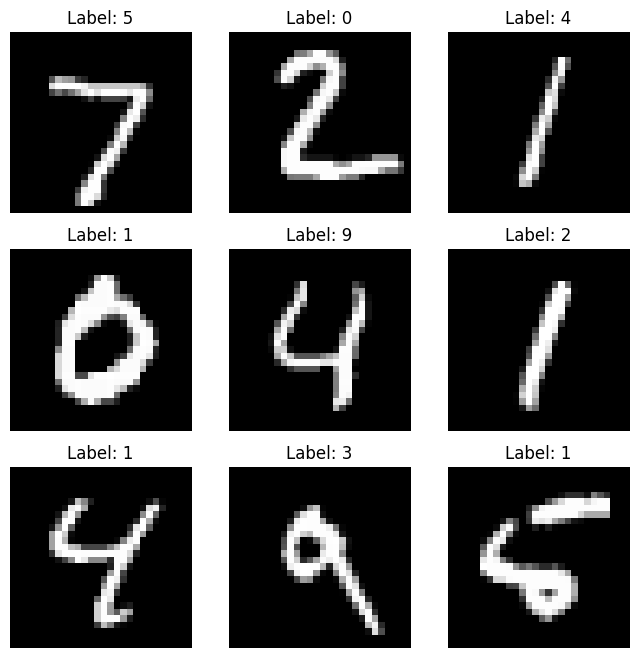

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')  # Fixed typo
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [9]:
(x_train_c10,y_train_c10),(x_test_c10,y_test_c10)=tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0
print(f'CIFAR 10 train shape: {x_train_c10.shape}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
CIFAR 10 train shape: (50000, 32, 32, 3)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.1096 - loss: 2.3071 - val_accuracy: 0.1120 - val_loss: 2.2997
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.1102 - loss: 2.3011 - val_accuracy: 0.1110 - val_loss: 2.2998
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.1164 - loss: 2.2990 - val_accuracy: 0.0950 - val_loss: 2.3029
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.1191 - loss: 2.2971 - val_accuracy: 0.1150 - val_loss: 2.3035
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.1337 - loss: 2.2875 - val_accuracy: 0.1045 - val_loss: 2.3080


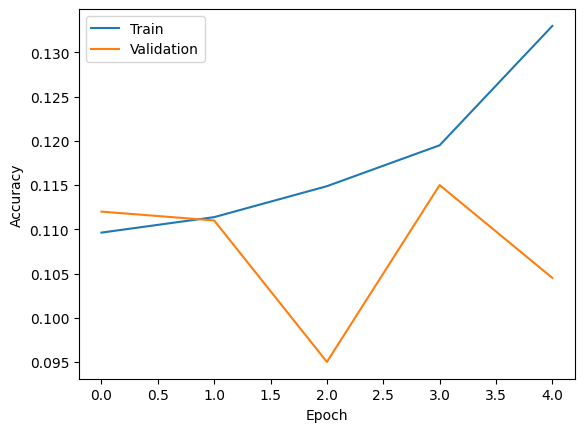

In [12]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],
         label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test Accuracy:{test_acc:4f}")
y_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0566 - loss: 76.1563
Test Accuracy:{test_acc:4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [14]:
from tensorflow.keras.layers import Dropout


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_c10)

In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # ✅ updated
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    datagen.flow(x_train_c10, y_train_c10, batch_size=32),
    epochs=10,
    validation_data=(x_test_c10, y_test_c10)
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 74ms/step - accuracy: 0.3444 - loss: 1.7825 - val_accuracy: 0.5165 - val_loss: 1.3308
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.5309 - loss: 1.3175 - val_accuracy: 0.5414 - val_loss: 1.3067
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.5871 - loss: 1.1806 - val_accuracy: 0.5939 - val_loss: 1.1651
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.6170 - loss: 1.1051 - val_accuracy: 0.6681 - val_loss: 0.9599
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.6364 - loss: 1.0569 - val_accuracy: 0.6487 - val_loss: 0.9911
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.6470 - loss: 1.0216 - val_accuracy: 0.6361 - val_loss: 1.0608
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.6591 - loss: 0.9813 - val_accuracy: 0.5751 - val_loss: 1.3918
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 73ms/step - accuracy: 0.6696 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1000
           1       0.75      0.82      0.78      1000
           2       0.77      0.35      0.48      1000
           3       0.53      0.44      0.48      1000
           4       0.55      0.76      0.64      1000
           5       0.78      0.33      0.47      1000
           6       0.67      0.78      0.72      1000
           7       0.72      0.70      0.71      1000
           8       0.83      0.63      0.72      1000
           9       0.46      0.93      0.62      1000

    accuracy                           0.64     10000
   macro avg       0.68      0.64      0.63     10000
weighted avg       0.68      0.64      0.63     10000



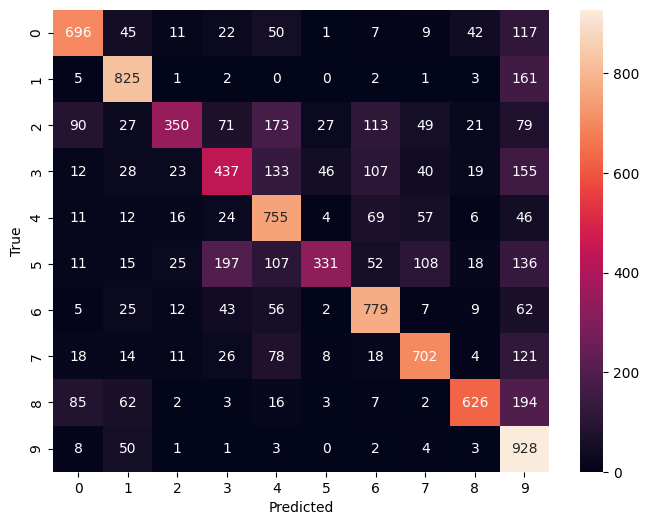

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

import seaborn as sns

y_pred_c10 = model.predict(x_test_c10).argmax(axis=1)


cm = confusion_matrix(y_test_c10, y_pred_c10)


print(classification_report(y_test_c10, y_pred_c10))

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [18]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
100% 217M/218M [00:00<00:00, 242MB/s]
100% 218M/218M [00:00<00:00, 285MB/s]


In [19]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r') as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 396s 2s/step - accuracy: 0.7729 - loss: 0.5633 - val_accuracy: 0.7985 - val_loss: 0.5123
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 394s 2s/step - accuracy: 0.8011 - loss: 0.4945 - val_accuracy: 0.7985 - val_loss: 0.5231
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.7986 - loss: 0.4911 - val_accuracy: 0.7985 - val_loss: 0.5151
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.8022 - loss: 0.4668 - val_accuracy: 0.7985 - val_loss: 0.5285
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 388s 2s/step - accuracy: 0.8033 - loss: 0.4527 - val_accuracy: 0.7985 - val_loss: 0.5433


In [22]:
base_model.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=3,
    validation_data=val_generator
)



Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1699s 7s/step - accuracy: 0.7992 - loss: 0.4929 - val_accuracy: 0.7985 - val_loss: 0.5324
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1696s 7s/step - accuracy: 0.8091 - loss: 0.4411 - val_accuracy: 0.7985 - val_loss: 0.5315
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1796s 7s/step - accuracy: 0.8029 - loss: 0.4275 - val_accuracy: 0.7985 - val_loss: 0.5305


In [23]:
model.save('mobilenet_cats_dogs.h5')
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')


63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step


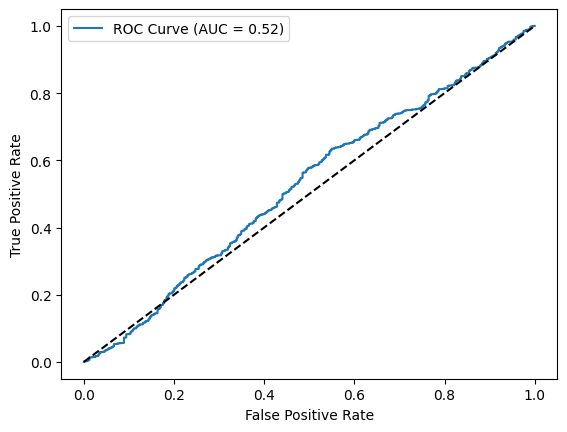

In [28]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = loaded_model.predict(val_generator)
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [29]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'download.jpg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving download.jpg to download.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Dog


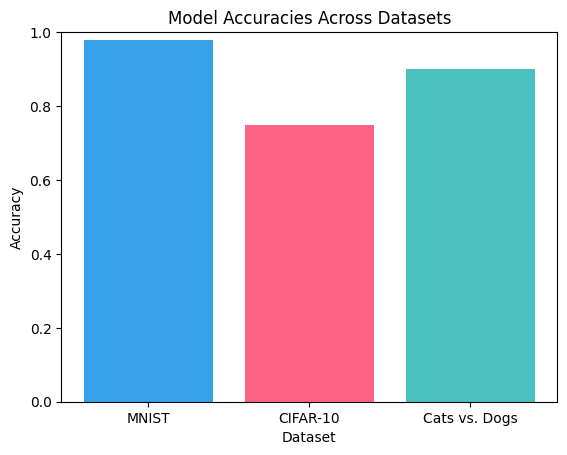

In [30]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.90]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()